In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import os
os.chdir('/home/ubuntu/Masters_Thesis/scripts')
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_dirs = ['/home/ubuntu/Masters_Thesis/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

In [2]:
W = 0

In [3]:
processed = pd.read_csv(f'/home/ubuntu/Masters_Thesis/results/final_results/final_model_results/Processed_Result_W{W}.csv')
nonprocessed = pd.read_csv(f'/home/ubuntu/Masters_Thesis/results/final_results/final_model_results/NonProcessed_Result_W{W}.csv')

In [4]:
processed.drop(columns={'Unnamed: 0'}, inplace = True)
nonprocessed.drop(columns={'Unnamed: 0'}, inplace = True)

In [5]:
full_data = pd.merge(processed, nonprocessed, on=['network_name', 'feature'], suffixes=('_p', '_np'))

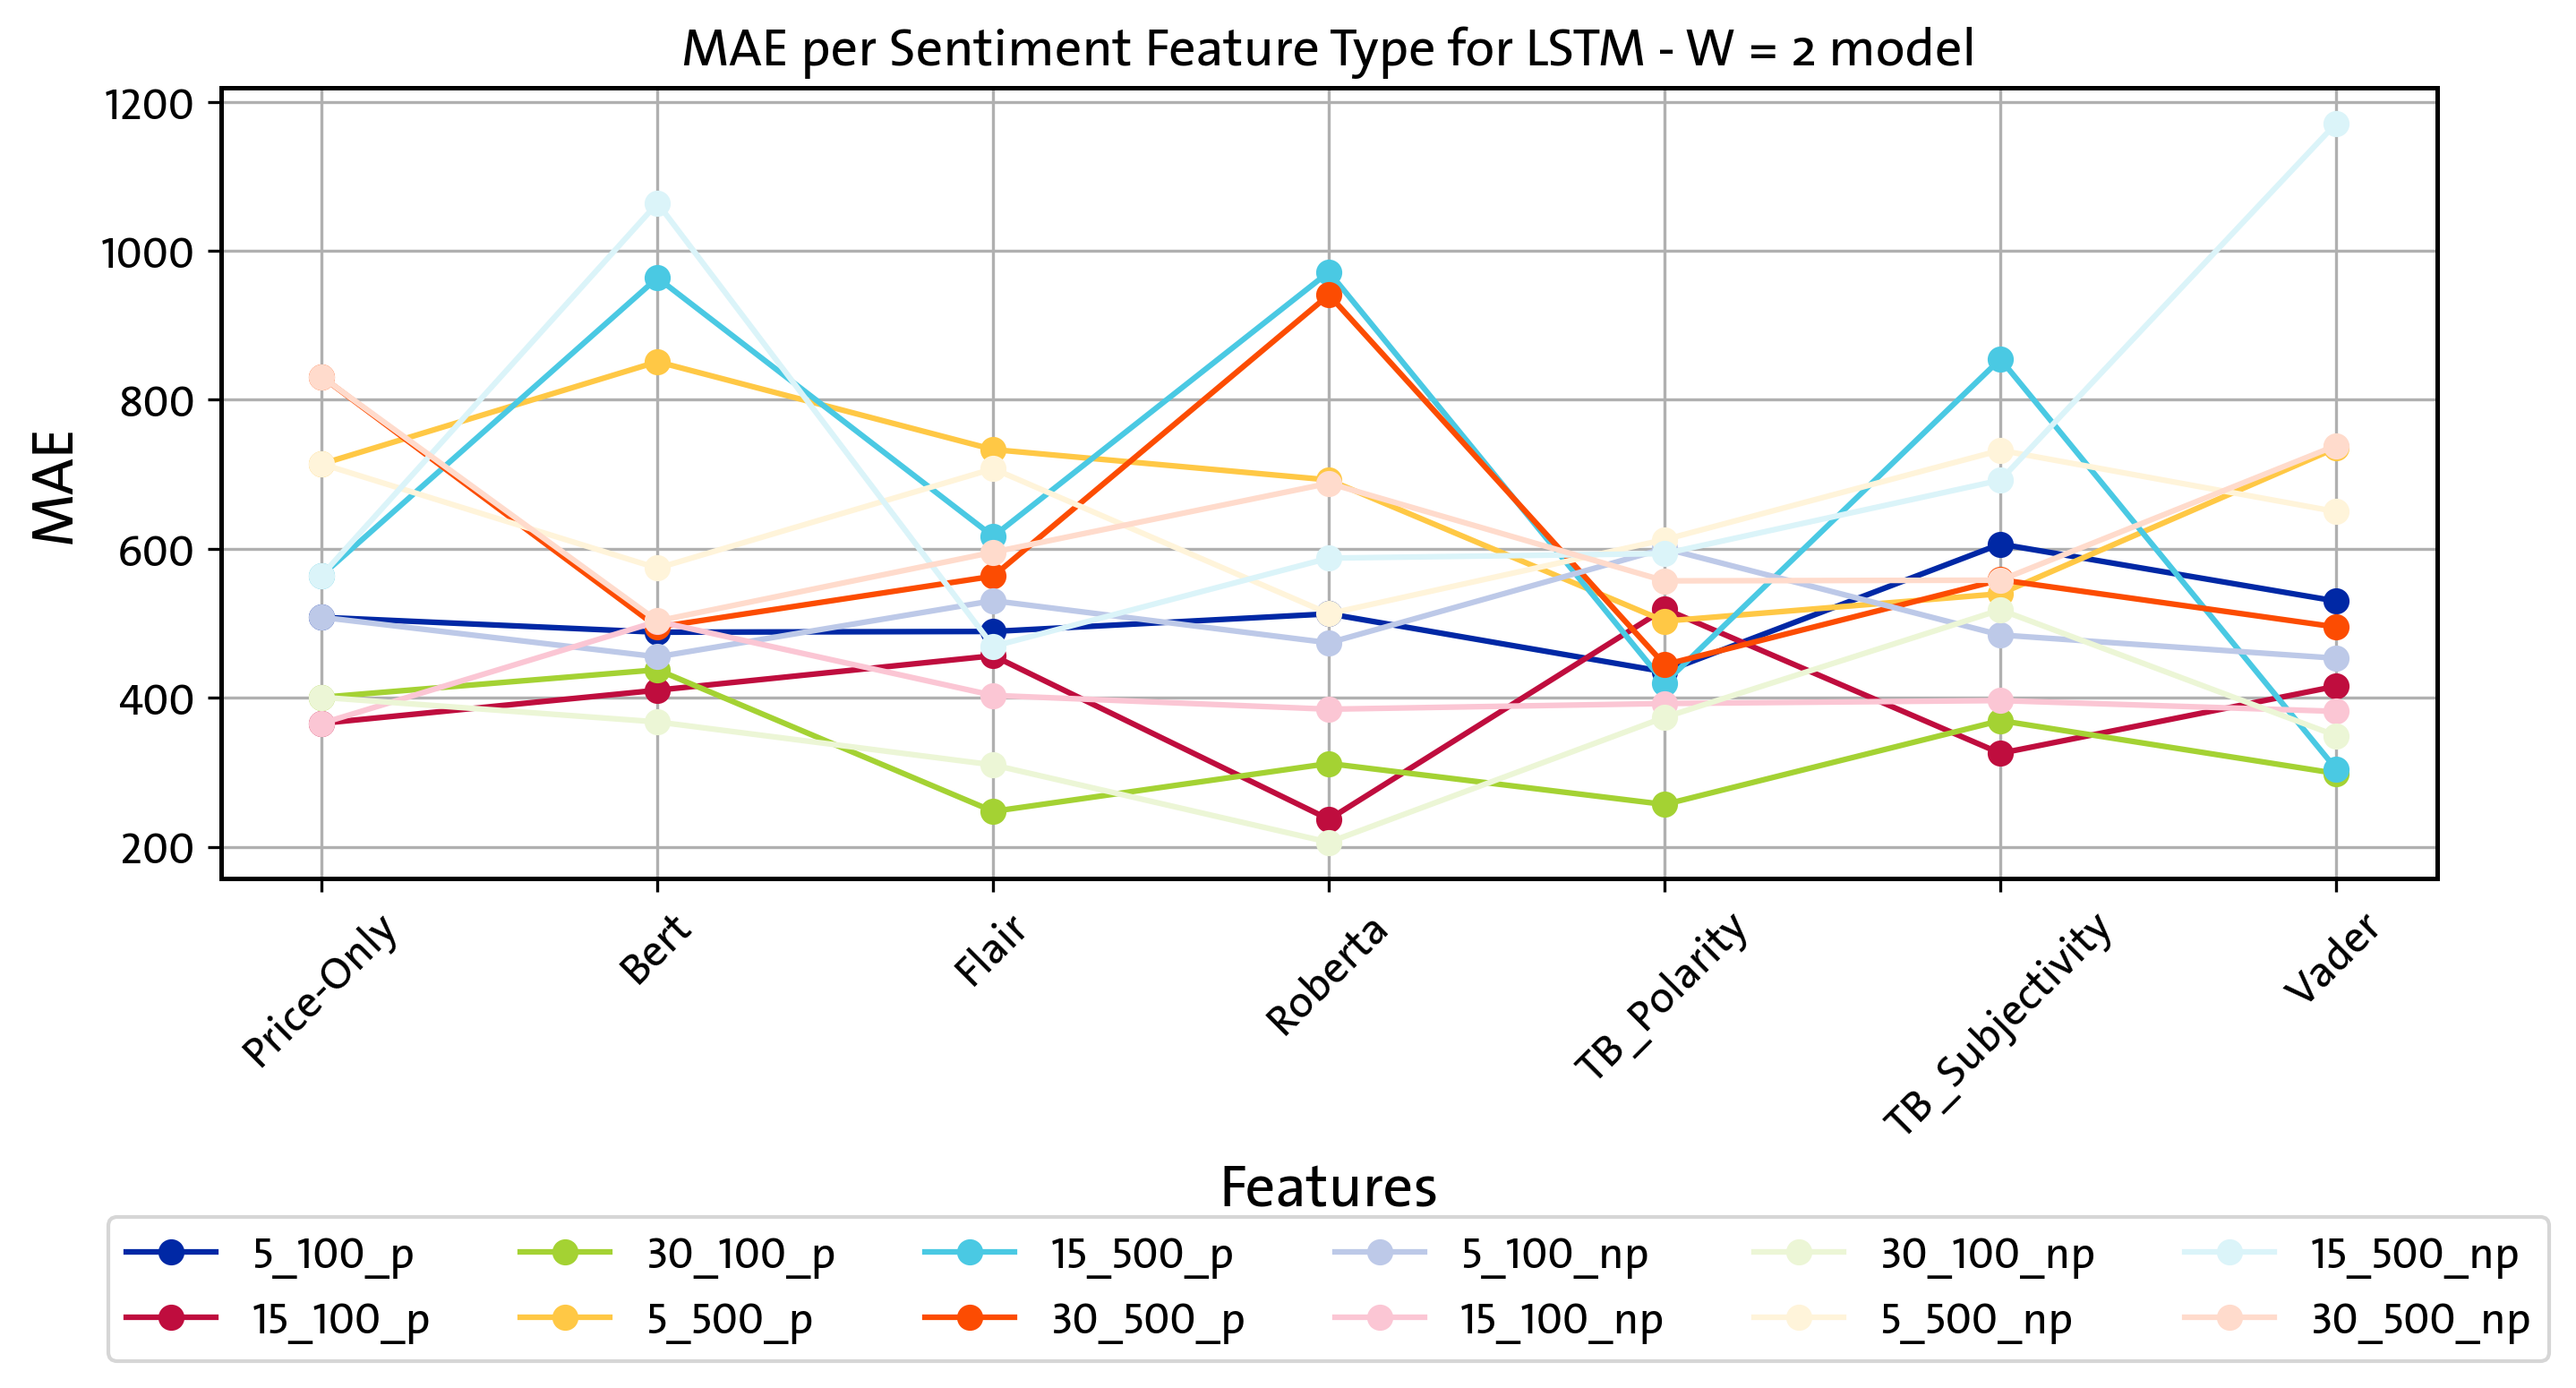

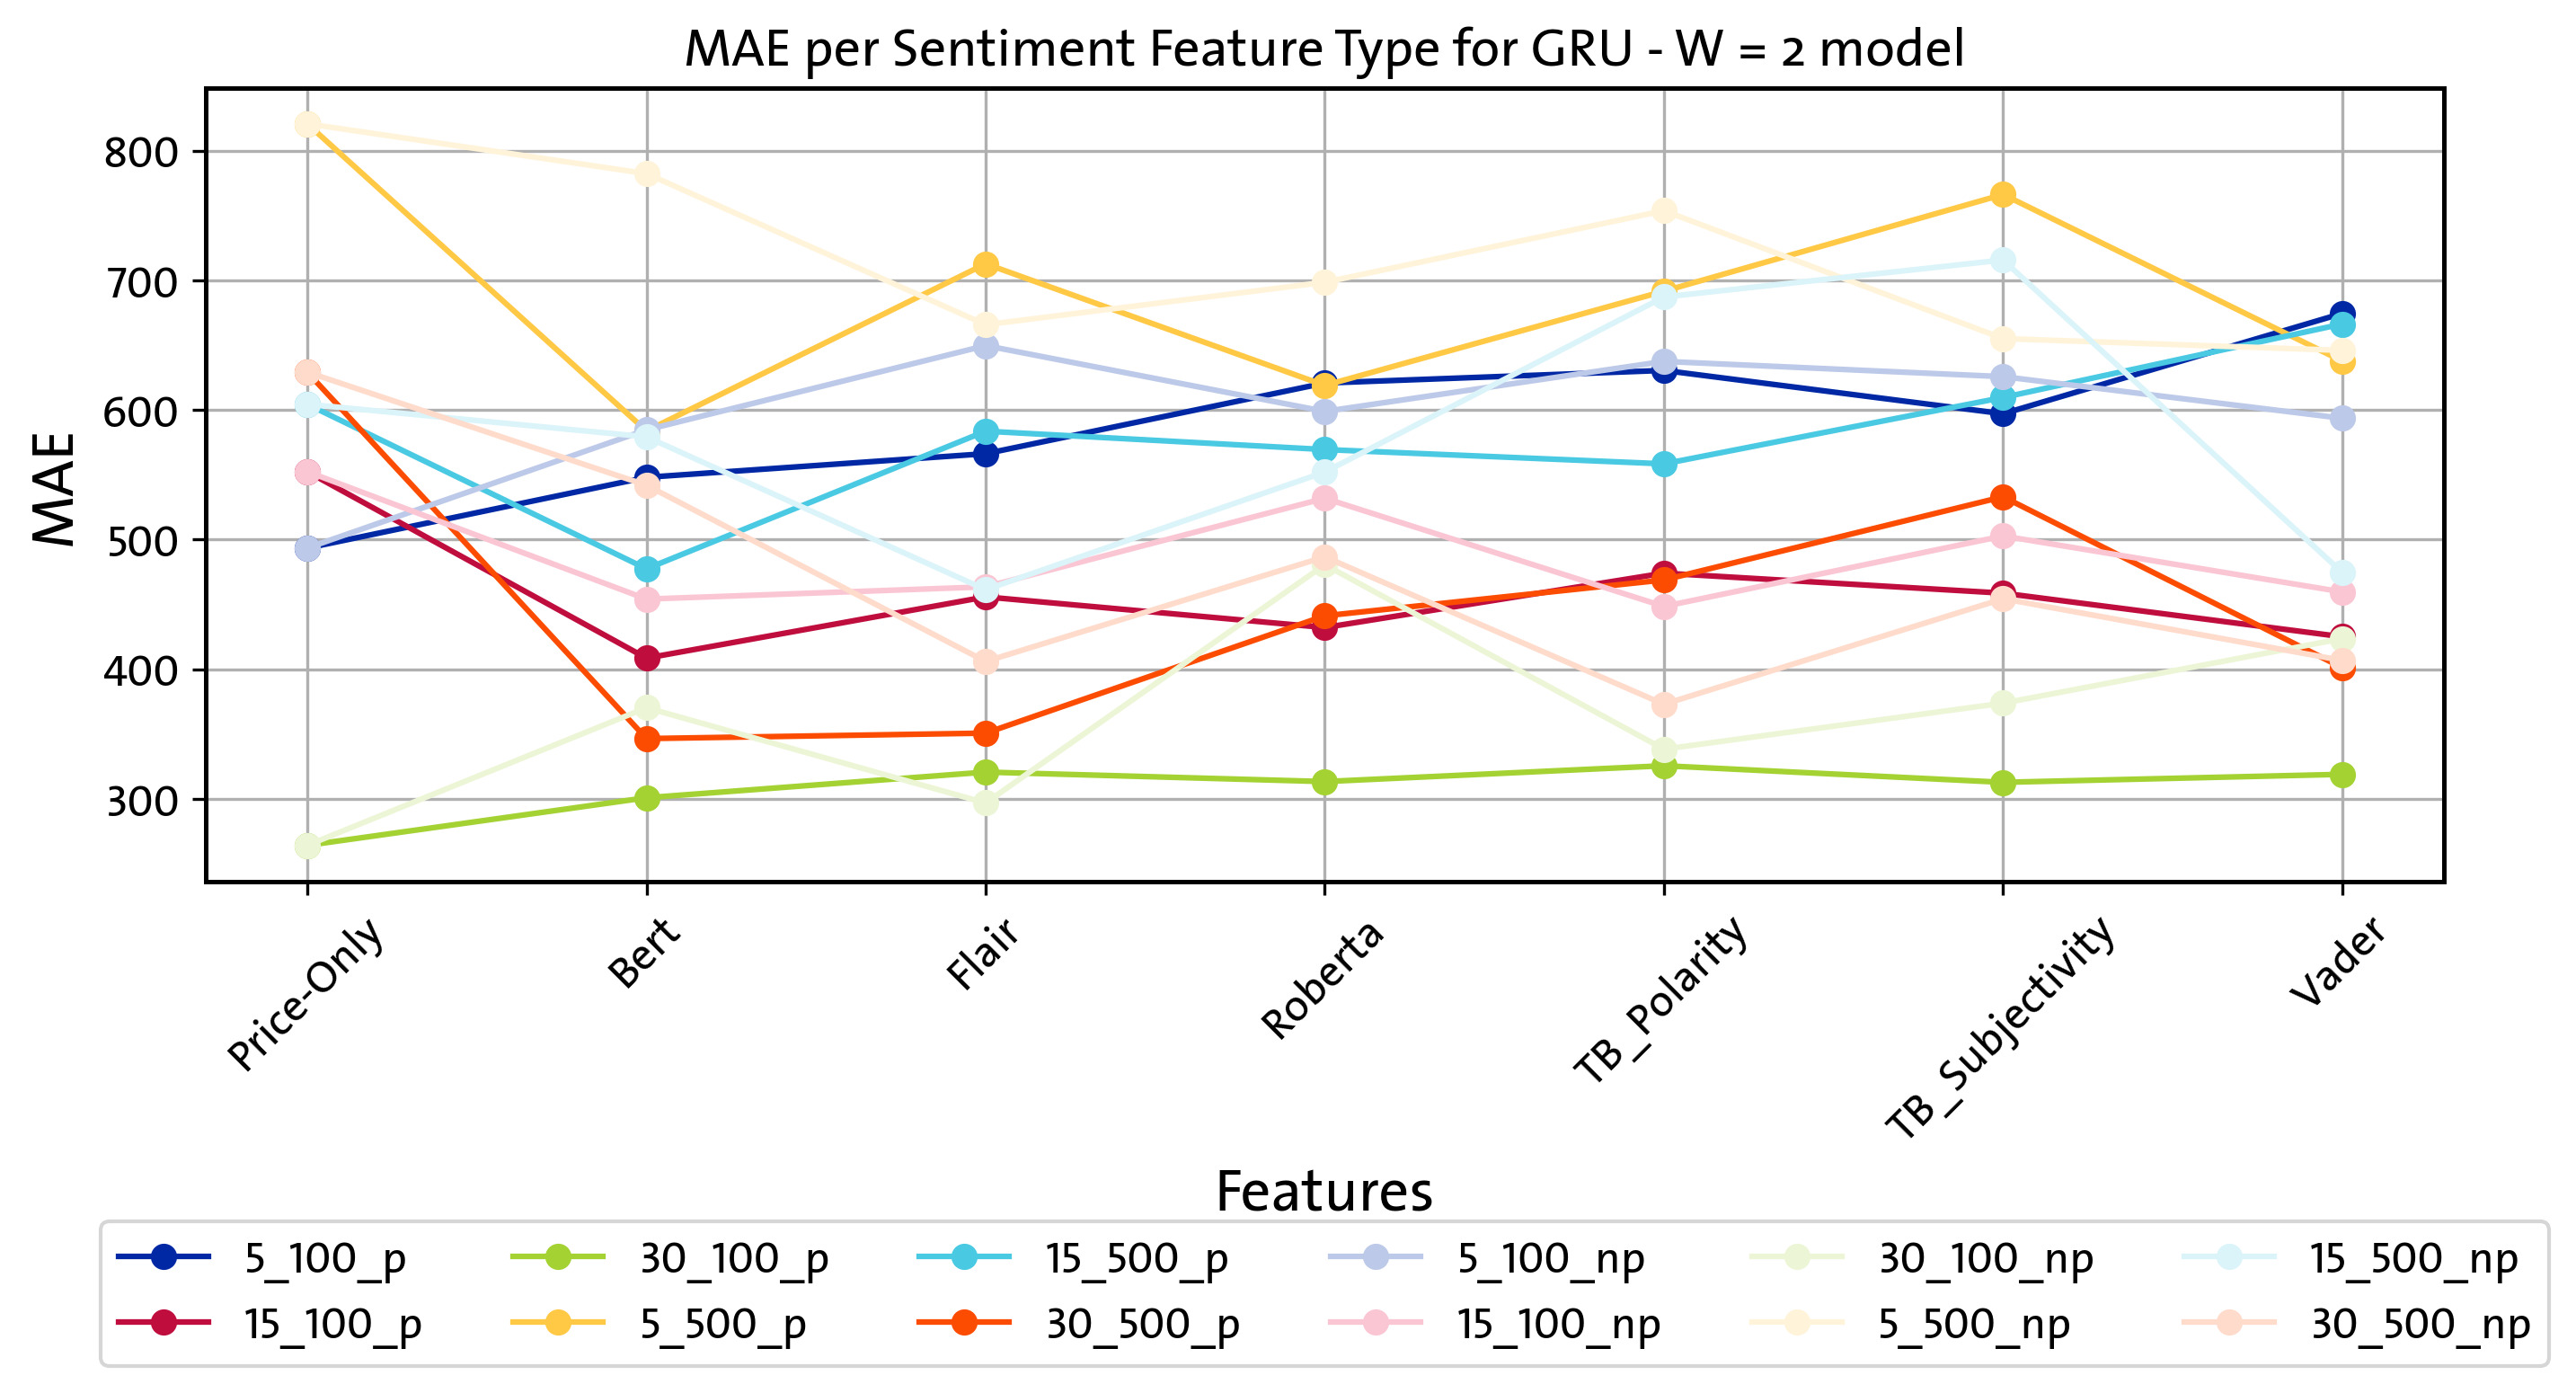

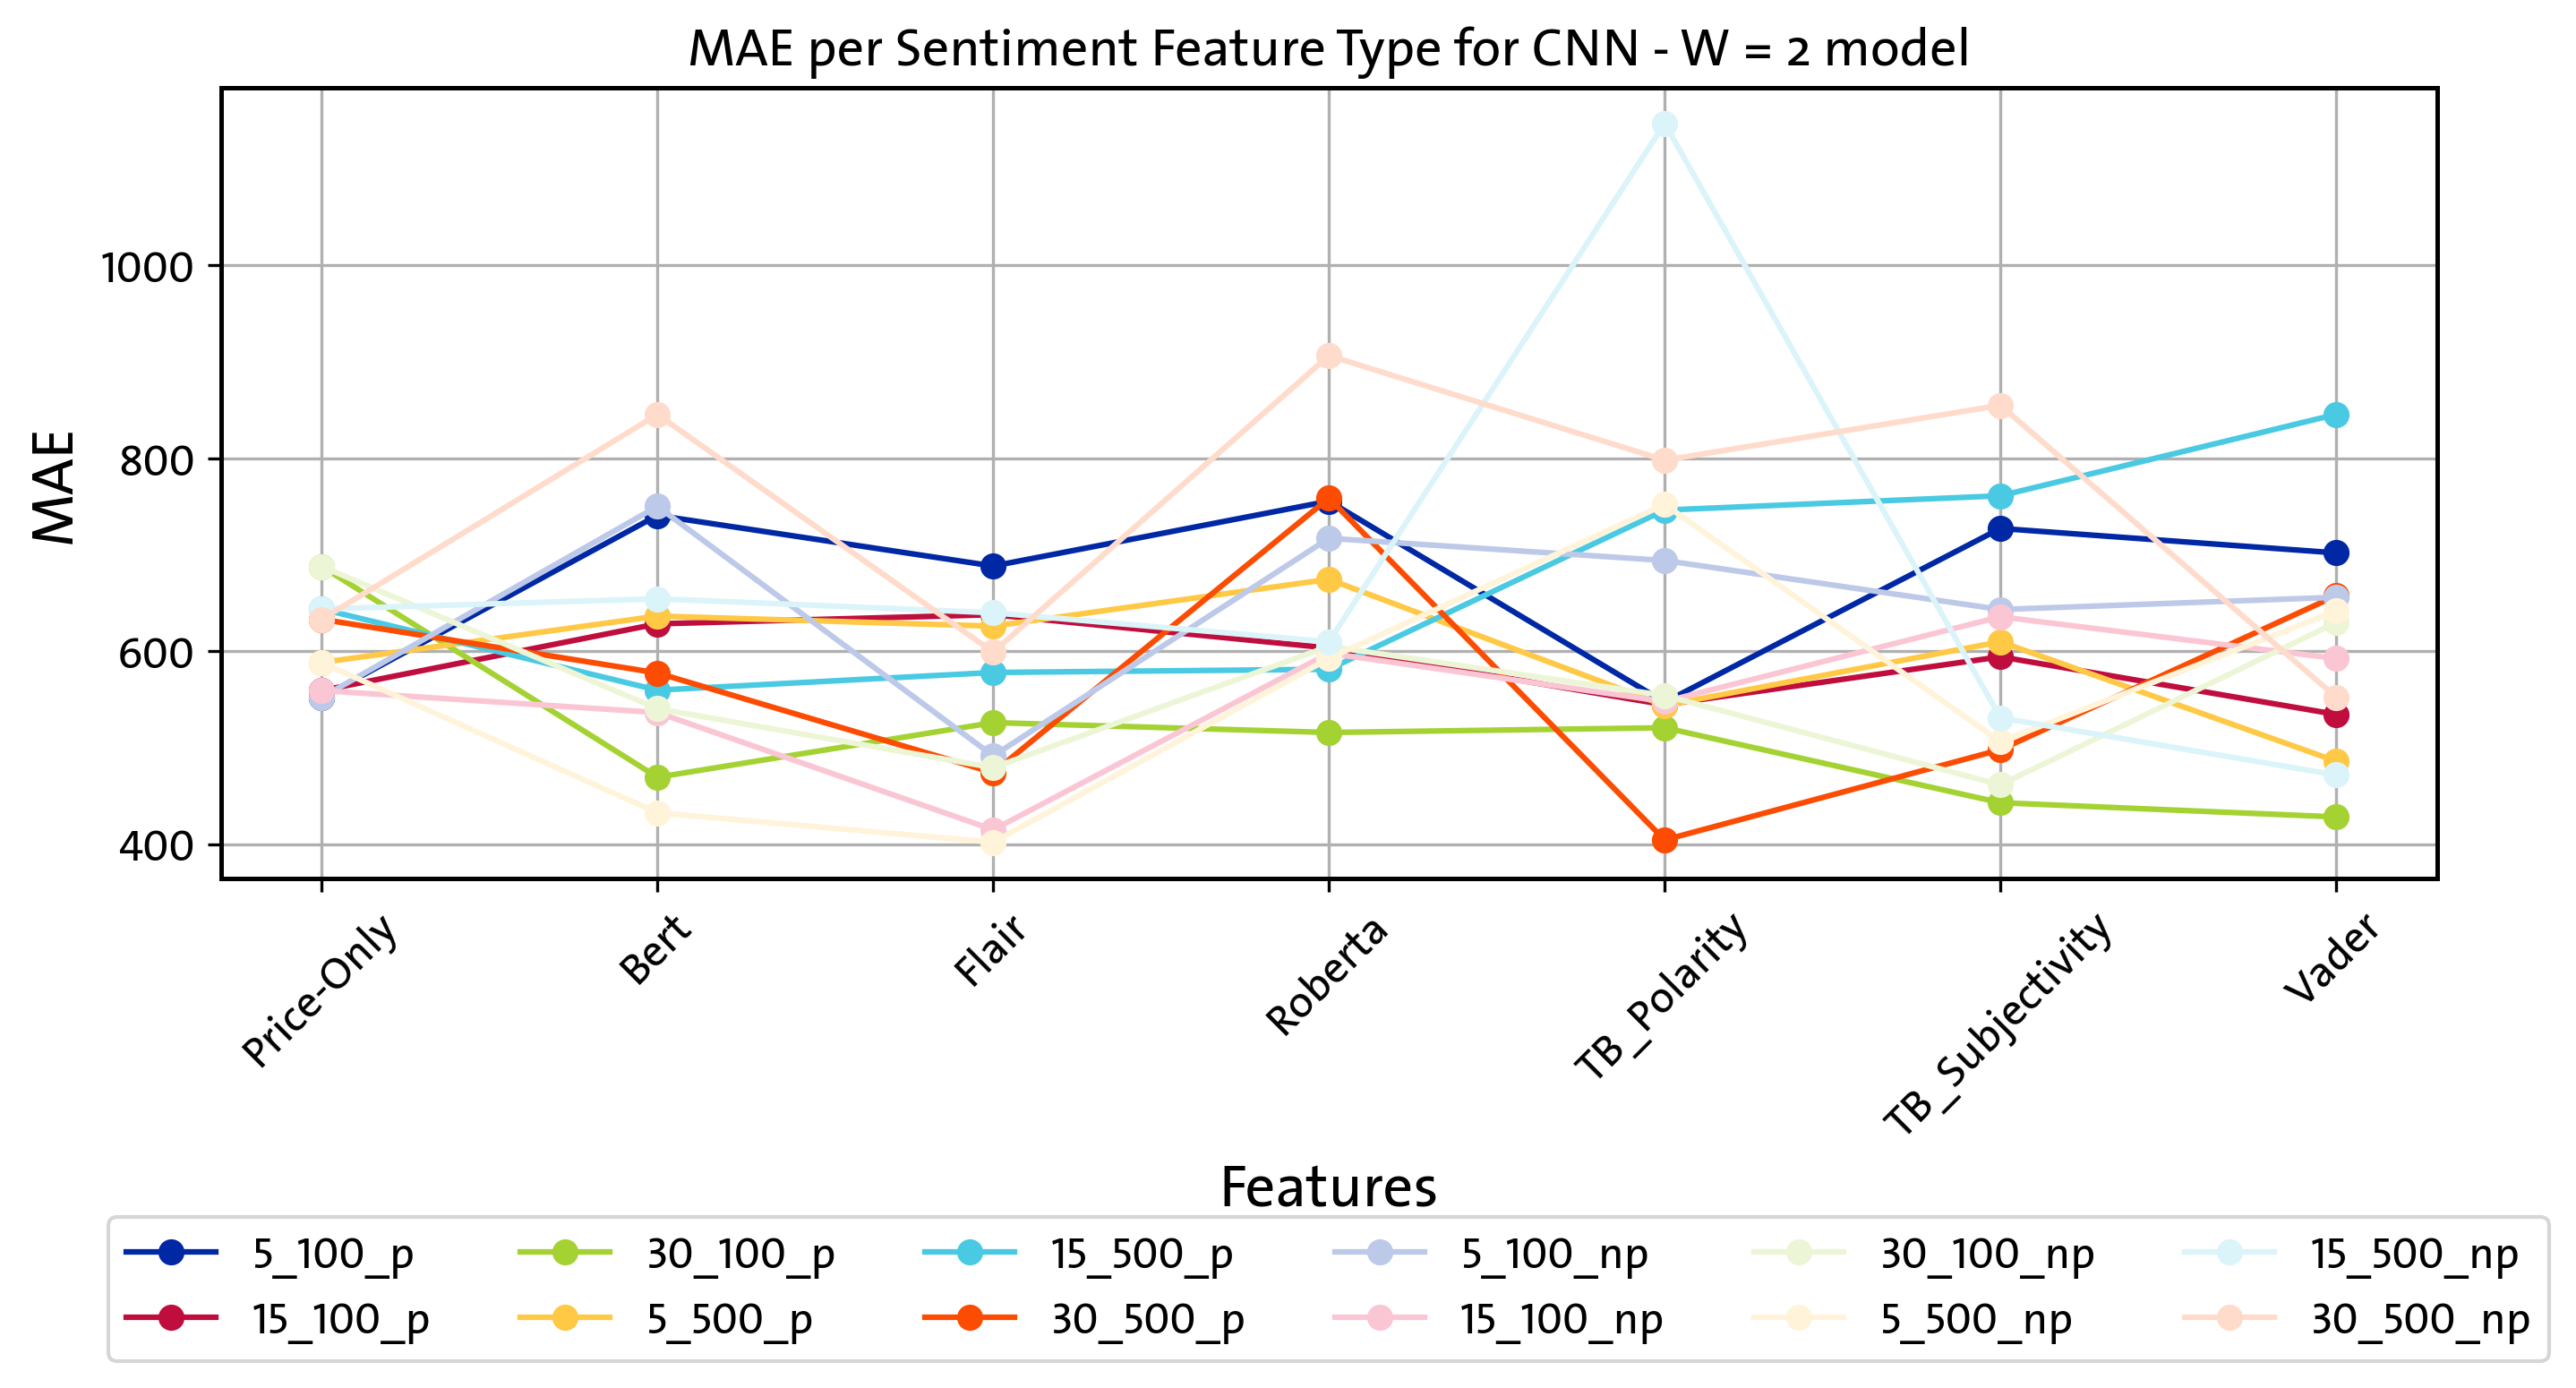

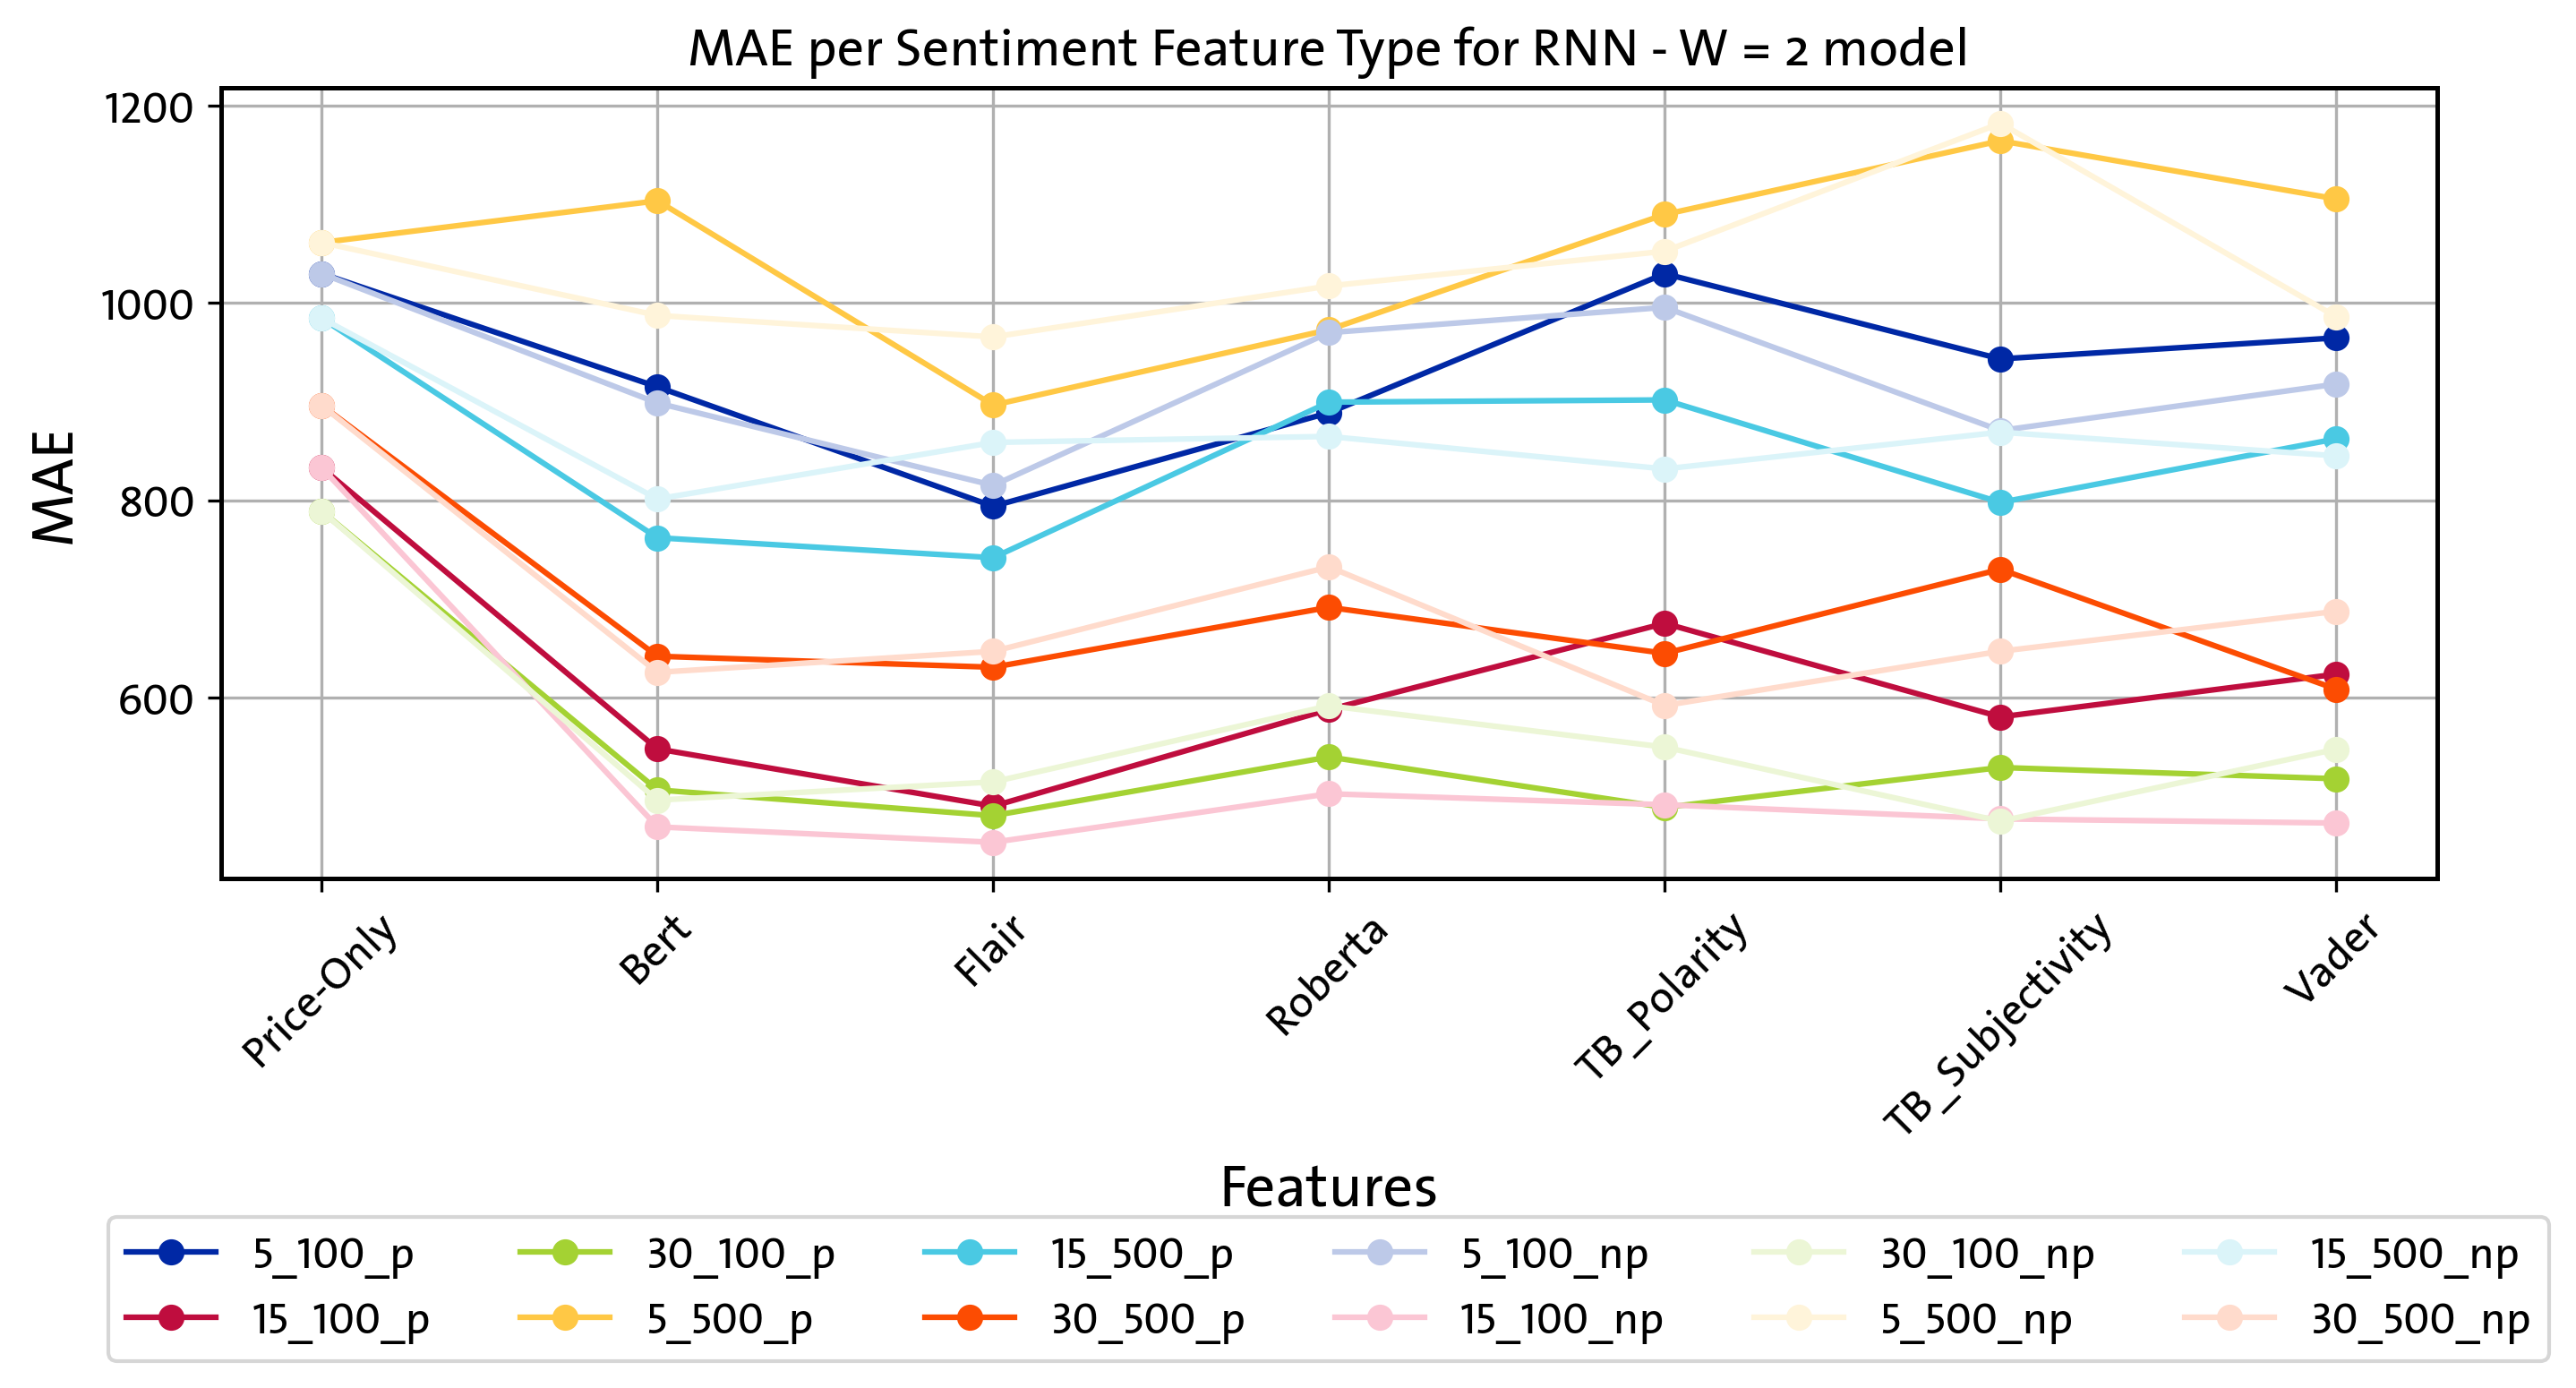

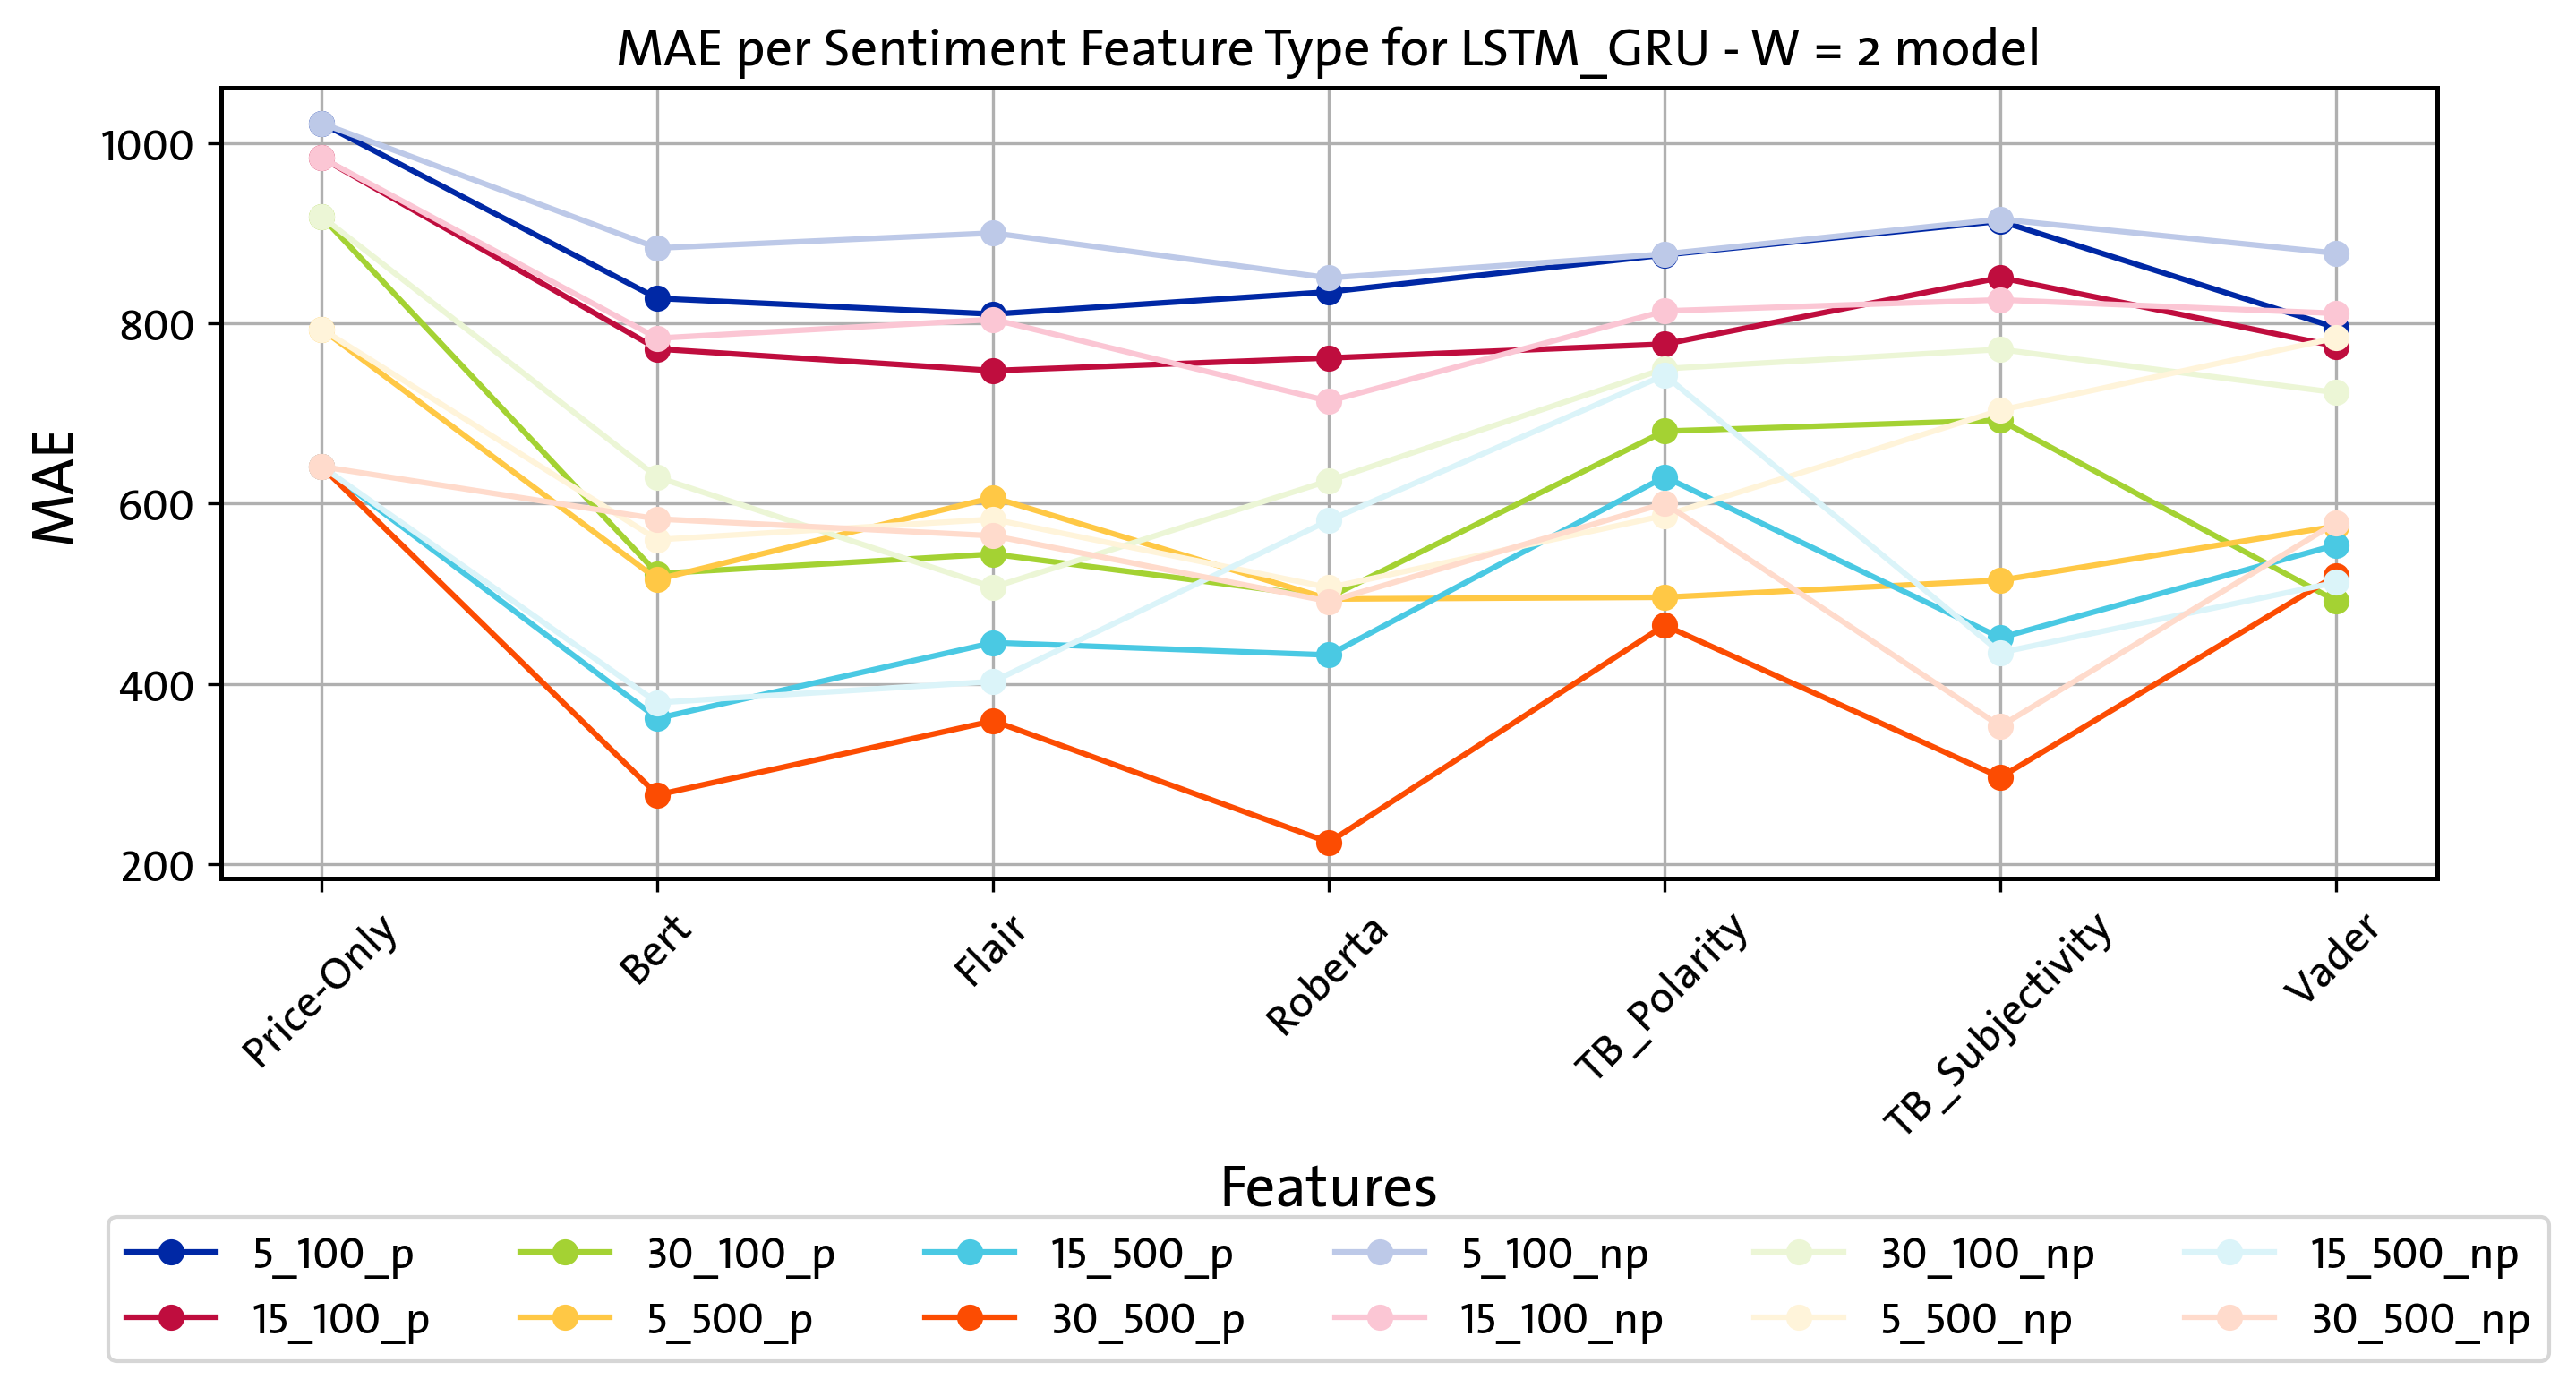

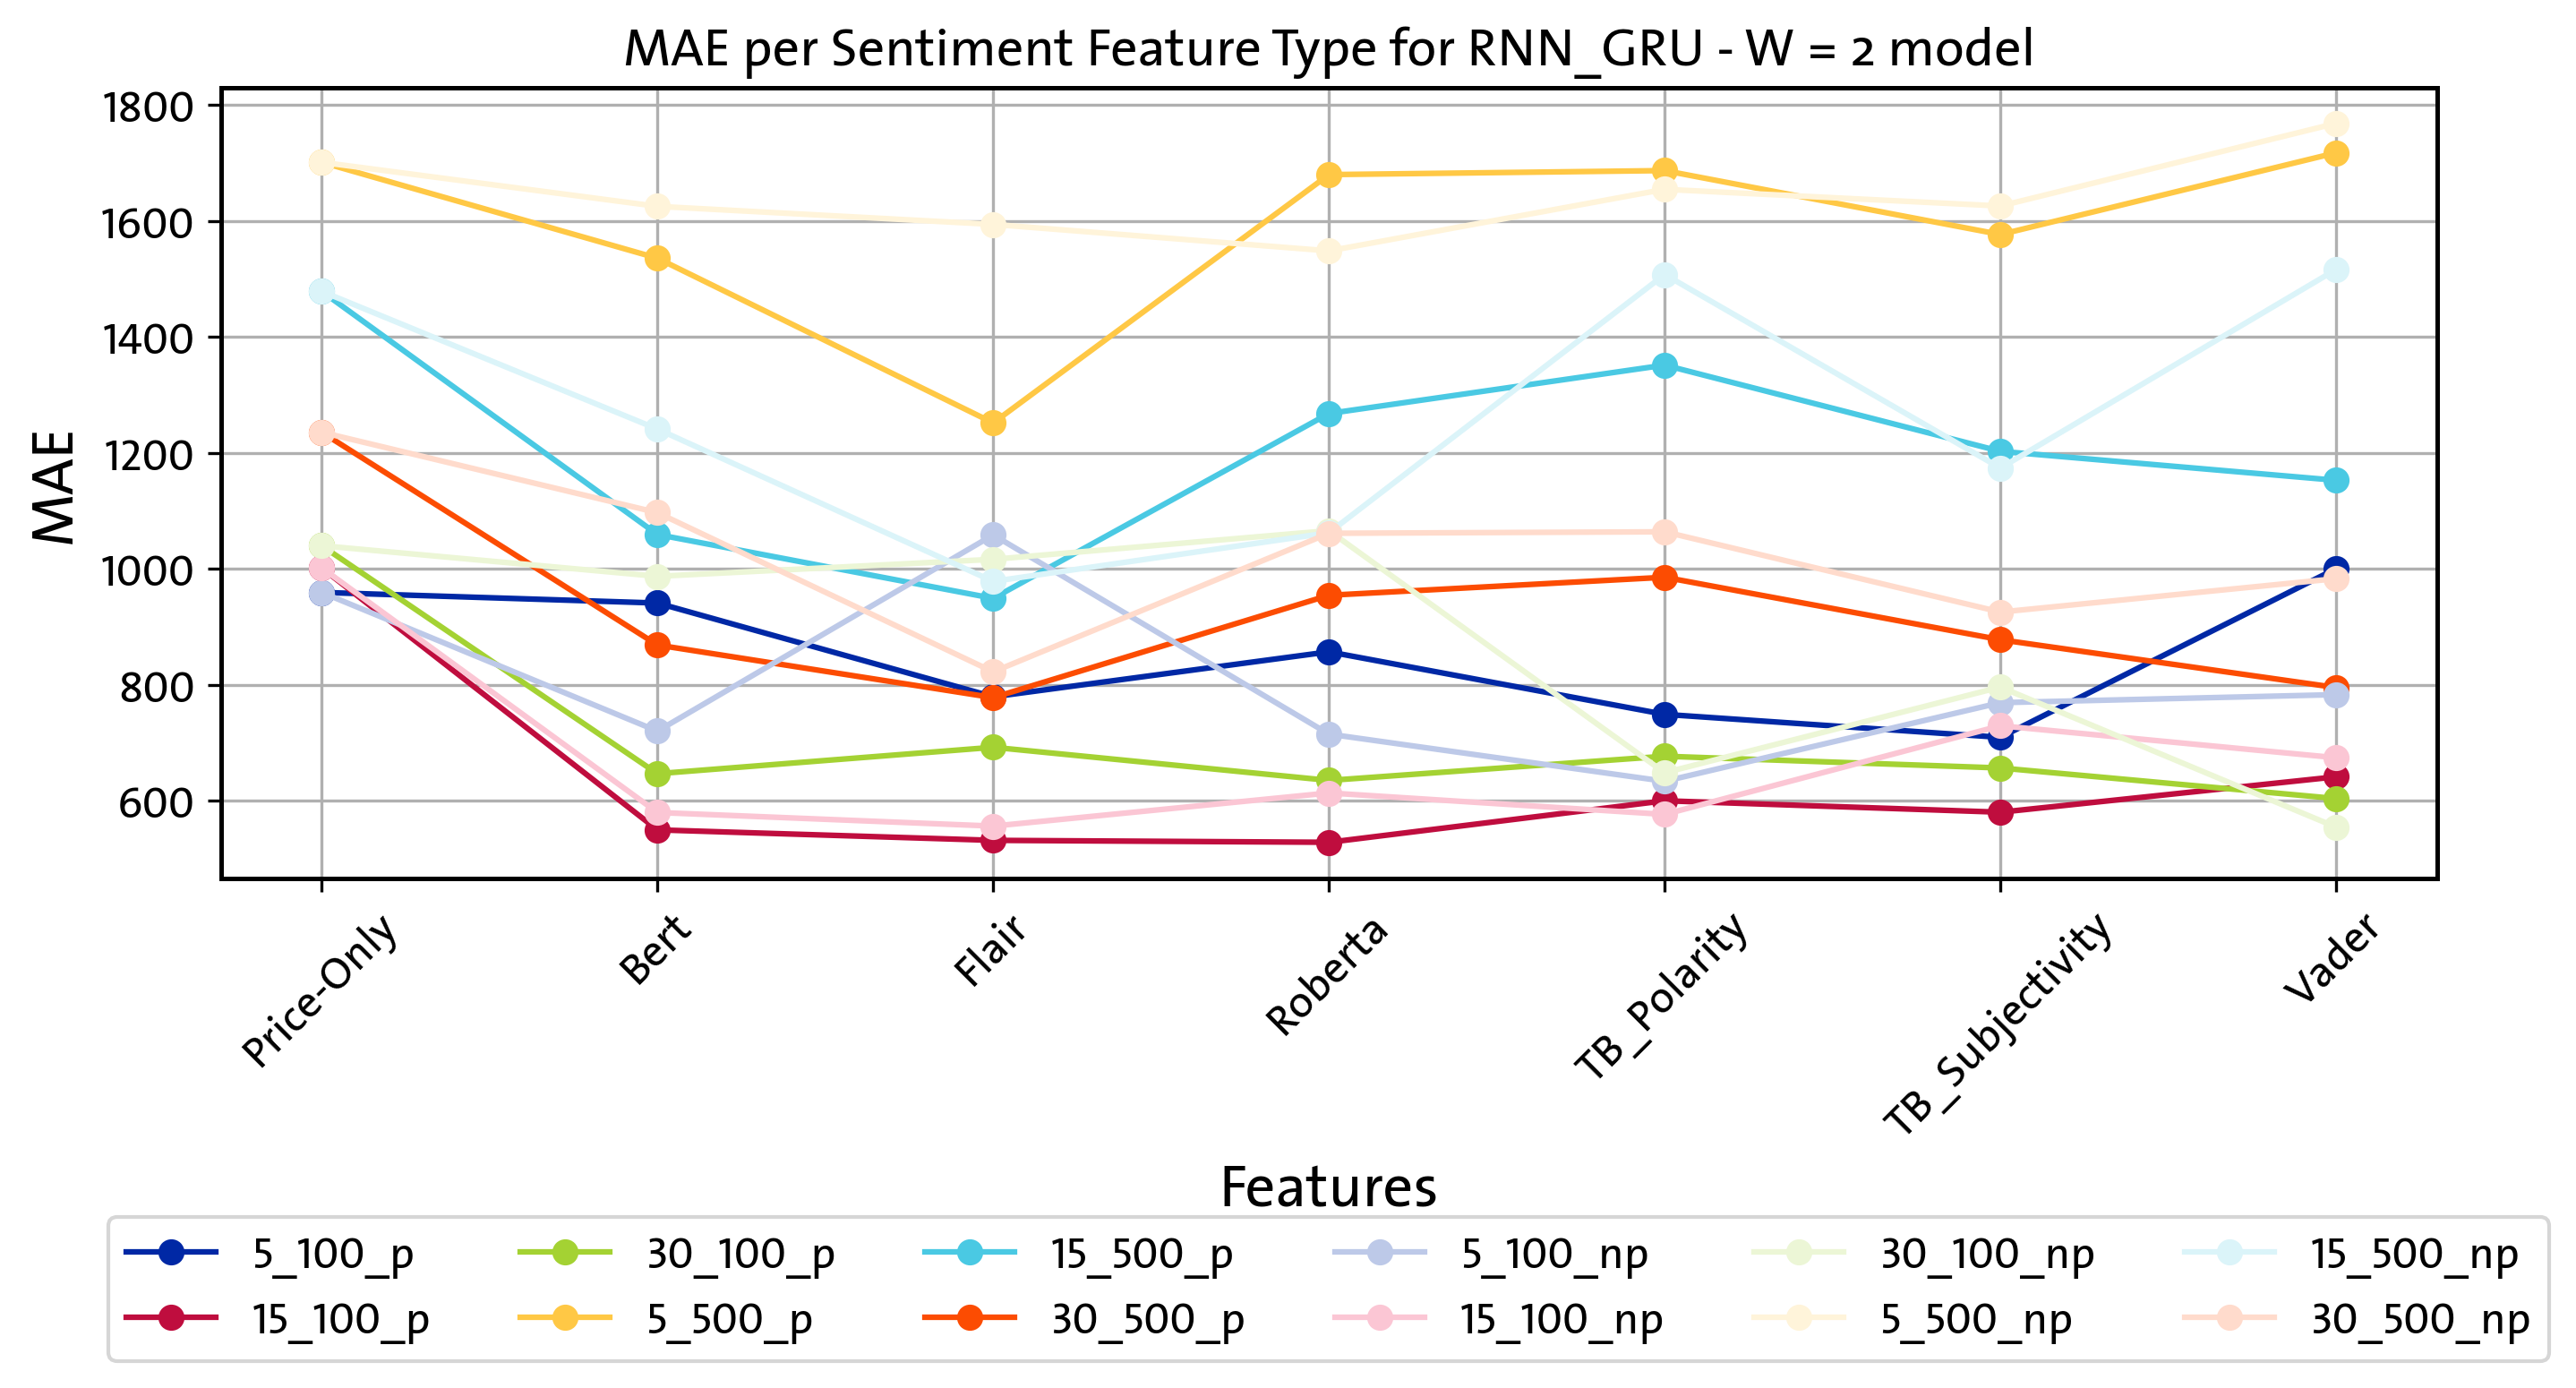

In [6]:
def plot_results(df, network_name, forecast):
    filtered_df = df[df['network_name'] == network_name]

    # Set up the plot
    plt.figure(figsize=(10, 6))

    # Plot the MAE values for each feature
    for col in filtered_df.columns:
        if col.startswith('mae'):
            past = col.split('_')[1]
            epoch = col.split('_')[2]
            processed = col.split('_')[3]
            plt.plot(filtered_df['feature'], filtered_df[col], marker='o', label=f'{past}_{epoch}_{processed}')

    # Add labels and title
    plt.xlabel('Features')
    plt.ylabel('MAE')
    plt.title(f'MAE per Sentiment Feature Type for {network_name} - W = {forecast+1} model')
    plt.xticks(rotation=45)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=6)
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.savefig(f'/home/ubuntu/Masters_Thesis/results/result_plots/MAEFeaturePlot_{network_name}_W{forecast+1}.pdf', bbox_inches='tight', facecolor='white')
    plt.show()

plot_results(full_data, 'LSTM', forecast=W)
plot_results(full_data, 'GRU', forecast=W)
plot_results(full_data, 'CNN', forecast=W)
plot_results(full_data, 'RNN', forecast=W)
plot_results(full_data, 'LSTM_GRU', forecast=W)
plot_results(full_data, 'RNN_GRU', forecast=W)